In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# READ DATA
df= pd.read_csv('titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

In [8]:
df.describe() # I can notice that count of age is not full ie. there are missing values for age, but it cannot tell for non integer column as nan is also a string

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check for missing data

In [9]:
# to check missing data - lets make a heatmap
# first make a boolean table of null value-true, non null-false
# notice here cabin has false as well which was not visible earlier

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

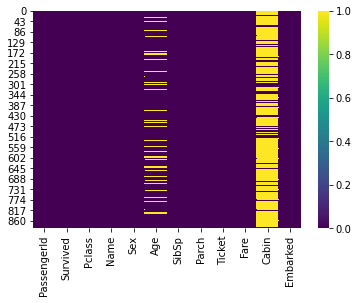

In [14]:
# we will make a heatmap of this boolean table
sns.heatmap(df.isnull(), cmap= 'viridis')
# leftlabel shows index value 0 th to 890th 
# this clearly shows missing values in age and cabin represented by yellow lines !
# we will deal with this later

<AxesSubplot:xlabel='Survived', ylabel='count'>

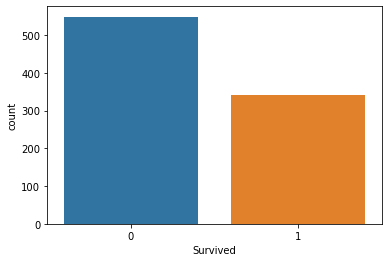

In [16]:
# this is a classification problem, so first see the ratio of survived and not survived
sns.countplot(x='Survived', data=df)
# shows around 330 people survived and 540 not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

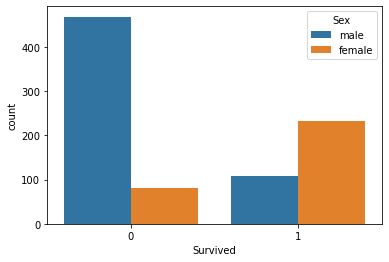

In [17]:
# lets check survival with sex of the person
sns.countplot(x='Survived', hue='Sex', data=df)
# shows out of the 330 people that survived , around 100 were male and 230 were female

<AxesSubplot:xlabel='Survived', ylabel='count'>

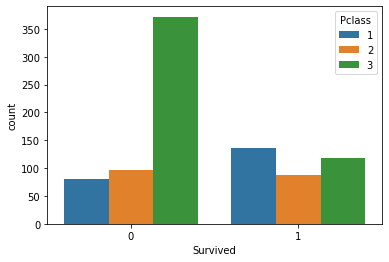

In [20]:
# lets relate survival of a person with his passenger class
sns.countplot(x='Survived',hue='Pclass', data=df)


C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

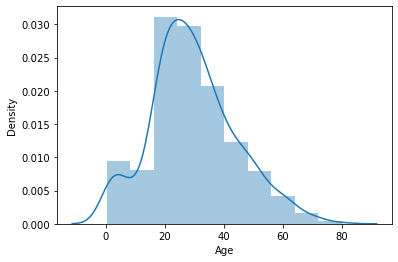

In [26]:
#lets see the age of passengers
sns.distplot(df['Age'].dropna(), bins=10)
# shows the average age between 20 and 40

In [27]:
df.columns
# lets explore SibSp, Fare now

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

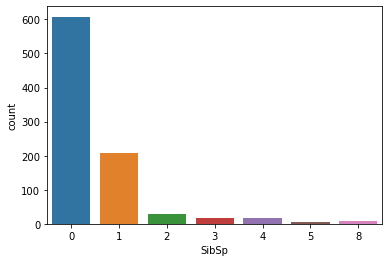

In [29]:
sns.countplot(x='SibSp', data=df)
# Shows most people were single and a couple

C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

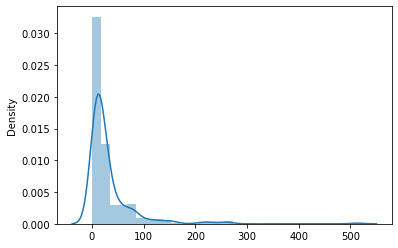

In [32]:
sns.distplot(x=df['Fare'], bins=30)
# most cheaper tickets were bought

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

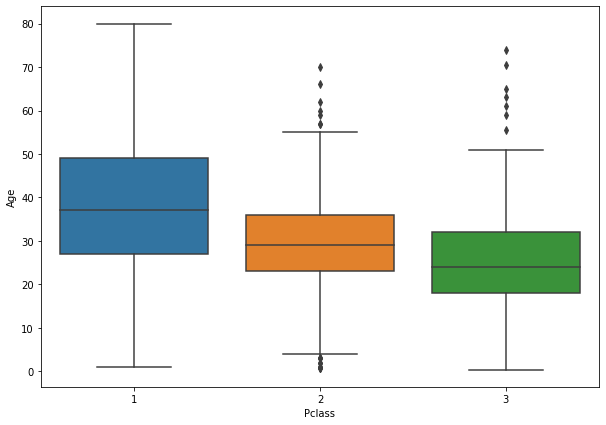

In [34]:
# filling missing data
# we could fill missing data in age column with average of all ages
# or we could be smarter and fill it by average age per passenger class

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df)
# shows passenger in 1st class are older than pass in 2nd and 3rd class 
# avg age of 1st class- 37
# avg age of 2nd class- 30
# avg age of 3rd class- 25

In [40]:
# make a function to fill age column acc to pass class
def func(cols):
    
    age= cols[0];
    pclas=cols[1];
    
    if pd.isnull(age):
        if pclas==1:
            return 37
        elif pclas==2:
            return 30
        else :
            return 25
            
    else:
        return age;
    
df['Age']= df[['Age', 'Pclass']].apply(func, axis=1)   
    

<AxesSubplot:>

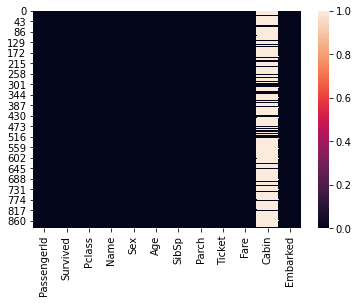

In [42]:
sns.heatmap(df.isnull(), data=df)
# age is solved
# removing cabin- too much missing info

In [45]:
df.drop('Cabin', axis=1, inplace=True)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

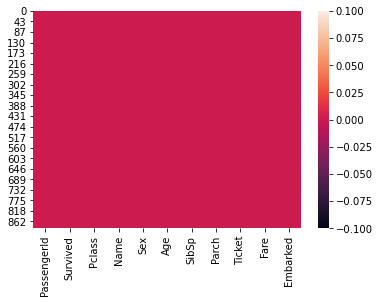

In [50]:
sns.heatmap(df.isnull())  # no missing value

# Dealing with Categorical Features
sex column needs to be taken care of - dummy variable format! 
embark column- dummy variable format

In [51]:
pd.get_dummies(df['Sex'])
# these are perfect predictors of each other- multicolinearity ! solve this issue

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [57]:
sex= pd.get_dummies(df['Sex'], drop_first=True)
# created a new data frame as sex

In [58]:
# new dataframe as embark
emb= pd.get_dummies(df['Embarked'])

In [59]:
emb.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [60]:
# add these to df
df= pd.concat([df, sex, emb], axis=1)

In [67]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [68]:
# remove unwanted cols
# df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'Parch'], axis=1, inplace=True)
df.drop(['Parch'], axis=1)

,Survived,Pclass,Age,SibSp,Fare,male,C,Q,S
0,0,3,22.0,1,7.2500,1,0,0,1
1,1,1,38.0,1,71.2833,0,1,0,0
2,1,3,26.0,0,7.9250,0,0,0,1
3,1,1,35.0,1,53.1000,0,0,0,1
4,0,3,35.0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,0,0,1
887,1,1,19.0,0,30.0000,0,0,0,1
888,0,3,25.0,1,23.4500,0,0,0,1
889,1,1,26.0,0,30.0000,1,1,0,0


# Model

In [78]:
X= df[['Pclass', 'Age', 'SibSp', 'Fare', 'male', 'C', 'Q', 'S']]
y= df[['Survived']]

In [79]:
print(X)

     Pclass   Age  SibSp     Fare  male  C  Q  S
0         3  22.0      1   7.2500     1  0  0  1
1         1  38.0      1  71.2833     0  1  0  0
2         3  26.0      0   7.9250     0  0  0  1
3         1  35.0      1  53.1000     0  0  0  1
4         3  35.0      0   8.0500     1  0  0  1
..      ...   ...    ...      ...   ... .. .. ..
886       2  27.0      0  13.0000     1  0  0  1
887       1  19.0      0  30.0000     0  0  0  1
888       3  25.0      1  23.4500     0  0  0  1
889       1  26.0      0  30.0000     1  1  0  0
890       3  32.0      0   7.7500     1  0  1  0

[889 rows x 8 columns]


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=101)

# TRAINING MODEL

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel= LogisticRegression()

In [86]:
logmodel.fit(X_train, y_train)

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# PREDICT THE TEST DATA

In [89]:
predictions= logmodel.predict(X_test)

In [90]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# EVALUATE MODEL

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.83      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 33,  71]], dtype=int64)